### Ирисы фишера

Классификация ирисов Фишера с помощью линейной регресии на основе следующих признаков:
  
- Длина наружной доли околоцветника 
- Ширина наружной доли околоцветника 
- Длина внутренней доли околоцветника 
- Ширина внутренней доли околоцветника

**Околоцветник** -  стерильная часть цветка, защищающая более нежные тычинки и пестики. 

3 класса - setosa, virginica, versicolor

![Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/330px-Irissetosa1.jpg) |  ![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg) |  ![Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg)
-- | -- | --
 


In [0]:
import matplotlib.pyplot as plt

def plot_features(values,x_data,x_labels):
  fig, axes = plt.subplots(4,4)
  formatter = plt.FuncFormatter(lambda i, *args: values.target_names[int(i)])

  for i in range(0,4):
    for j in range(0,4):
      if i == j:
        im = axes[i,j].hist(Iris_x_train[:,i])
        if i == 0:
           axes[i,j].set_title(values.feature_names[j])
        if j == 0:
           axes[i,j].set_ylabel(values.feature_names[i])
      else:
        axes[i,j].scatter(x_data[:,i], x_data[:,j], c=x_labels)
        if i == 0:
            axes[i,j].set_title(values.feature_names[j])
        if j == 0:
            axes[i,j].set_ylabel(values.feature_names[i])

  fig.tight_layout()

In [0]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

In [0]:
from sklearn import datasets
#Загрузка набора данных ирисы Фишера
values = datasets.load_iris()
print(values.keys())
#разделим на обучающую и тестовую выборку
Iris_x_train = values.data[:-30]
Iris_x_test = values.data[-30:]
Iris_y_train = values.target[:-30]
Iris_y_test = values.target[-30:]

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Text(0.5,1,'petal width (cm)')

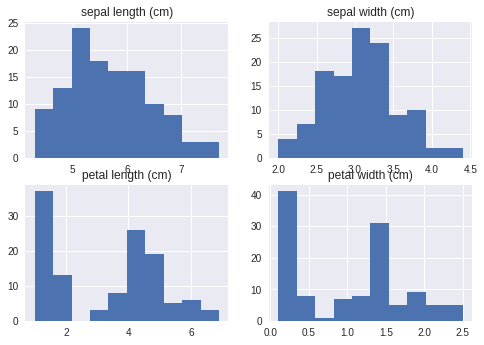

In [0]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2)
axes[0,0].hist(Iris_x_train[:,0])
axes[0,0].set_title(values.feature_names[0])
axes[0,1].hist(Iris_x_train[:,1])
axes[0,1].set_title(values.feature_names[1])
axes[1,0].hist(Iris_x_train[:,2])
axes[1,0].set_title(values.feature_names[2])
axes[1,1].hist(Iris_x_train[:,3])
axes[1,1].set_title(values.feature_names[3])


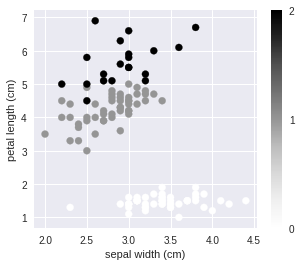

In [0]:
plt.figure(figsize=(5, 4))
plt.scatter(Iris_x_train[:,1], Iris_x_train[:,2], c=Iris_y_train)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(values.feature_names[1])
plt.ylabel(values.feature_names[2])
plt.show()

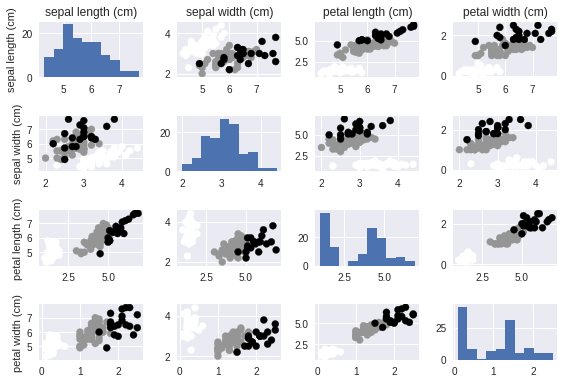

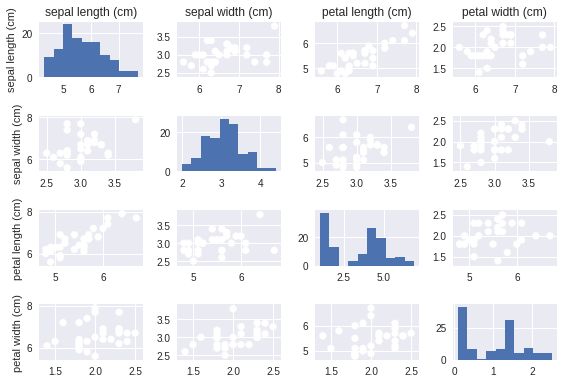

In [0]:
plot_features(values, Iris_x_train, Iris_y_train)
plot_features(values, Iris_x_test, Iris_y_test)

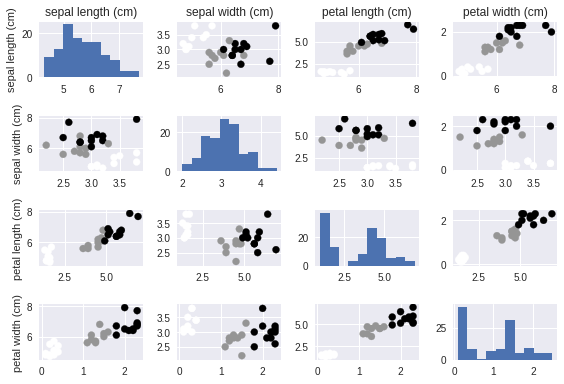

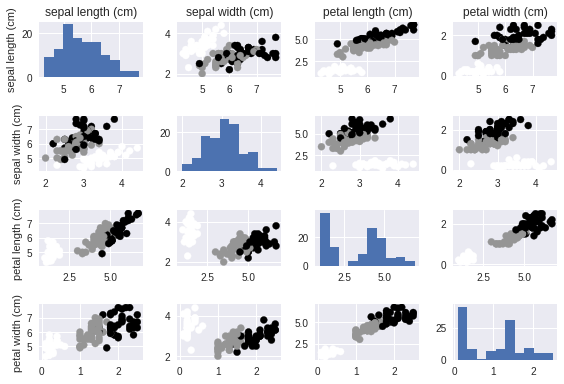

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(values.data, values.target, test_size=0.20, random_state = 42)
plot_features(values,X_test,y_test)
plot_features(values,X_train,y_train)

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
# Создаем линейную модель с градиентным методом обновлениемкоэффициентов
regr = linear_model.SGDClassifier(alpha = 0.0001, epsilon = 0.0001, loss='squared_loss',max_iter=100000, eta0=0.001, random_state = 0)
# Обучение модели!
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# Коэффициенты модели
print('Коэффициенты: \n', regr.coef_)
print("средняя МНК: %.2f" % mean_squared_error(y_test, y_pred))
print("Точность: %.2f" % accuracy_score(y_test, y_pred))

Коэффициенты: 
 [[ 0.08485023  0.52060552 -0.42620125 -0.13879894]
 [ 0.0666154  -0.90689086  0.35183899 -0.81388212]
 [-0.15146563  0.38628534  0.07436226  0.95268106]]
средняя МНК: 0.10
Точность: 0.90


In [0]:
import time
accuracy_list_L2 = []
time_list_L2 = []
accuracy_list_L1 = []
time_list_L1 = []
accuracy_list = []
time_list = []
n_iter_list = [10000, 30000, 50000, 80000, 100000, 300000, 500000, 800000, 1000000]
for n_iter in n_iter_list:
  L2reg = linear_model.SGDClassifier(loss='squared_loss', max_iter = n_iter, random_state = 42)
  start_time = time.time()
  L2reg.fit(X_train, y_train)
  time_list_L2.append(time.time()-start_time)
  y_pred_L2 = L2reg.predict(X_test)
  accuracy_list_L2.append(accuracy_score(y_test, y_pred_L2))
  L1reg = linear_model.SGDClassifier(loss='squared_loss', max_iter = n_iter, penalty = 'l1', random_state = 42)
  start_time = time.time()
  L1reg.fit(X_train, y_train)
  time_list_L1.append(time.time()-start_time)
  y_pred_L1 = L1reg.predict(X_test)
  accuracy_list_L1.append(accuracy_score(y_test, y_pred_L1))
  reg = linear_model.SGDClassifier(loss='squared_loss', max_iter = n_iter, penalty = 'None', random_state = 42)
  start_time = time.time()
  reg.fit(X_train, y_train)
  time_list.append(time.time()-start_time)
  y_pred = reg.predict(X_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))

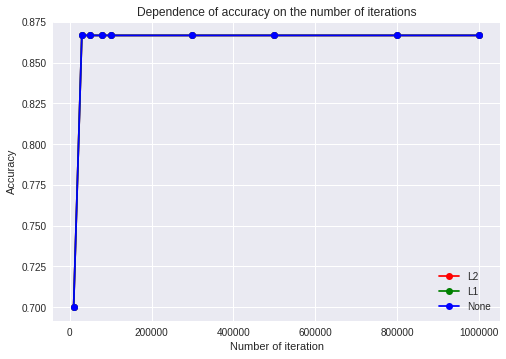

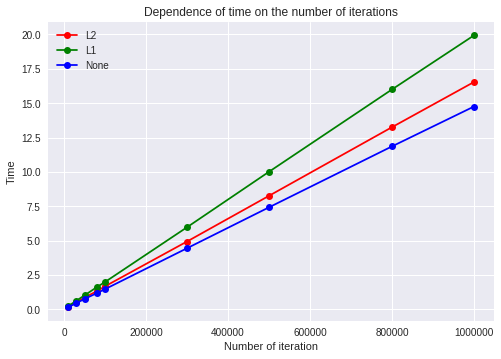

In [0]:
plt.figure()
plt.title("Dependence of accuracy on the number of iterations")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.plot(n_iter_list, accuracy_list_L2, 'o-', color="r", label="L2")
plt.plot(n_iter_list, accuracy_list_L1, 'o-', color="g", label="L1")
plt.plot(n_iter_list, accuracy_list, 'o-', color="b", label="None")
plt.legend(loc="best")
plt.show()
plt.figure()
plt.title("Dependence of time on the number of iterations")
plt.xlabel("Number of iteration")
plt.ylabel("Time")
plt.grid(True)
plt.plot(n_iter_list, time_list_L2, 'o-', color="r", label="L2")
plt.plot(n_iter_list, time_list_L1, 'o-', color="g", label="L1")
plt.plot(n_iter_list, time_list, 'o-', color="b", label="None")
plt.legend(loc="best")
plt.show()

In [0]:
regr_reg = linear_model.SGDClassifier(loss='squared_loss',max_iter=100000, epsilon = 0.000001, eta0 = 0.1, penalty='l1', alpha=0.00001, random_state = 1)
regr_reg.fit(X_train, y_train)


y_pred = regr_reg.predict(X_test)
print('Коэффициенты: \n', regr.coef_)
print("средняя МНК: %.2f" % mean_squared_error(y_test, y_pred))
print("Точность: %.2f" % accuracy_score(y_test, y_pred))

Коэффициенты: 
 [[ 0.08485023  0.52060552 -0.42620125 -0.13879894]
 [ 0.0666154  -0.90689086  0.35183899 -0.81388212]
 [-0.15146563  0.38628534  0.07436226  0.95268106]]
средняя МНК: 0.10
Точность: 0.90


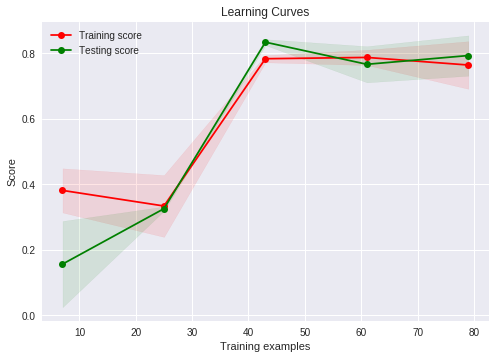

In [0]:
title = "Learning Curves"

plot_learning_curve(regr_reg, title, X_train, y_train)

plt.show()